# Data collection

In [1]:
# Import yfinance and Download Data
import yfinance as yf

df = yf.download("AAPL", start="2018-01-01", end="2025-01-01", auto_adjust=False)
print(df.head())
print(df.columns)

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2018-01-02  40.381001  43.064999  43.075001  42.314999  42.540001  102223600
2018-01-03  40.373955  43.057499  43.637501  42.990002  43.132500  118071600
2018-01-04  40.561493  43.257500  43.367500  43.020000  43.134998   89738400
2018-01-05  41.023312  43.750000  43.842499  43.262501  43.360001   94640000
2018-01-08  40.870930  43.587502  43.902500  43.482498  43.587502   82271200
MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [2]:
# Save Data to CSV
df.to_csv("AAPL_stock_data.csv", index=True)

In [1]:
# Data Import and Initial Cleanup
import pandas as pd

df = pd.read_csv("AAPL_stock_data.csv", skiprows=2)

print(df.columns)

df.rename(columns={'1': 'Date'}, inplace=True)
print(df.columns)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.head())

Index(['Date', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')
Index(['Date', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')
            Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
Date                                                                     
2018-01-02   40.381001   43.064999   43.075001   42.314999   42.540001   
2018-01-03   40.373955   43.057499   43.637501   42.990002   43.132500   
2018-01-04   40.561493   43.257500   43.367500   43.020000   43.134998   
2018-01-05   41.023312   43.750000   43.842499   43.262501   43.360001   
2018-01-08   40.870930   43.587502   43.902500   43.482498   43.587502   

            Unnamed: 6  
Date                    
2018-01-02   102223600  
2018-01-03   118071600  
2018-01-04    89738400  
2018-01-05    94640000  
2018-01-08    82271200  


In [2]:
# Column Renaming
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
print(df.head())
print(df.columns)

            Adj Close      Close       High        Low       Open     Volume
Date                                                                        
2018-01-02  40.381001  43.064999  43.075001  42.314999  42.540001  102223600
2018-01-03  40.373955  43.057499  43.637501  42.990002  43.132500  118071600
2018-01-04  40.561493  43.257500  43.367500  43.020000  43.134998   89738400
2018-01-05  41.023312  43.750000  43.842499  43.262501  43.360001   94640000
2018-01-08  40.870930  43.587502  43.902500  43.482498  43.587502   82271200
Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


# Data preprocessing

In [3]:
# Handle Missing Values
df.ffill(inplace=True)
print(df.head())
print(df.isna().sum())

            Adj Close      Close       High        Low       Open     Volume
Date                                                                        
2018-01-02  40.381001  43.064999  43.075001  42.314999  42.540001  102223600
2018-01-03  40.373955  43.057499  43.637501  42.990002  43.132500  118071600
2018-01-04  40.561493  43.257500  43.367500  43.020000  43.134998   89738400
2018-01-05  41.023312  43.750000  43.842499  43.262501  43.360001   94640000
2018-01-08  40.870930  43.587502  43.902500  43.482498  43.587502   82271200
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [4]:
# Missing Values Inspection
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [Adj Close, Close, High, Low, Open, Volume]
Index: []


In [5]:
# Remove duplicates based on index
df = df[~df.index.duplicated(keep='first')]

print(df.head())
print(df.tail())
print("Remaining rows:", len(df))

            Adj Close      Close       High        Low       Open     Volume
Date                                                                        
2018-01-02  40.381001  43.064999  43.075001  42.314999  42.540001  102223600
2018-01-03  40.373955  43.057499  43.637501  42.990002  43.132500  118071600
2018-01-04  40.561493  43.257500  43.367500  43.020000  43.134998   89738400
2018-01-05  41.023312  43.750000  43.842499  43.262501  43.360001   94640000
2018-01-08  40.870930  43.587502  43.902500  43.482498  43.587502   82271200
             Adj Close       Close        High         Low        Open  \
Date                                                                     
2024-12-24  257.286682  258.200012  258.209991  255.289993  255.490005   
2024-12-26  258.103729  259.019989  260.100006  257.630005  258.190002   
2024-12-27  254.685883  255.589996  258.700012  253.059998  257.829987   
2024-12-30  251.307861  252.199997  253.500000  250.750000  252.229996   
2024-12-31  249.5

In [6]:
# Feature Engineering
df['Return'] = df['Close'].pct_change()
df['MA20'] = df['Close'].rolling(window=20).mean()
print(df[['Return', 'MA20']].head())
print(df.tail())

df.dropna(inplace=True)
df = df.asfreq('B')     # Business day frequency
df = df.ffill()

              Return  MA20
Date                      
2018-01-02       NaN   NaN
2018-01-03 -0.000174   NaN
2018-01-04  0.004645   NaN
2018-01-05  0.011385   NaN
2018-01-08 -0.003714   NaN
             Adj Close       Close        High         Low        Open  \
Date                                                                     
2024-12-24  257.286682  258.200012  258.209991  255.289993  255.490005   
2024-12-26  258.103729  259.019989  260.100006  257.630005  258.190002   
2024-12-27  254.685883  255.589996  258.700012  253.059998  257.829987   
2024-12-30  251.307861  252.199997  253.500000  250.750000  252.229996   
2024-12-31  249.534164  250.419998  253.279999  249.429993  252.440002   

              Volume    Return        MA20  
Date                                        
2024-12-24  23234700  0.011478  246.293500  
2024-12-26  27237100  0.003176  247.491499  
2024-12-27  42355300 -0.013242  248.524500  
2024-12-30  35557500 -0.013263  249.267999  
2024-12-31  39480700 -

In [7]:
# Train/Test Split 
train = df[df.index < '2023-01-01']
test = df[df.index >= '2023-01-01']
print(train.shape)
print(test.shape)

(1284, 8)
(522, 8)


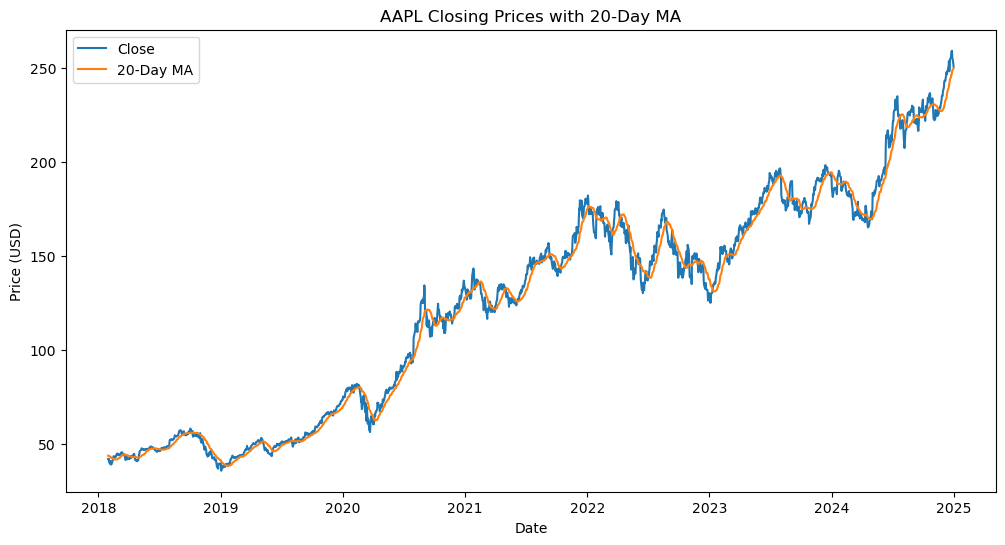

In [8]:
# Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close')
plt.plot(df['MA20'], label='20-Day MA')
plt.title("AAPL Closing Prices with 20-Day MA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Model-1 ARIMA (AutoRegressive Integrated Moving Average)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from pmdarima import auto_arima
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Target variable: 'Close' price
train_series = train['Close']
test_series = test['Close']

# Exogenous variables (Features that help predict 'Close')
exog_features = ['Open', 'High', 'Low', 'Volume', 'MA20', 'Return'] 
exog_train = train[exog_features]
exog_test = test[exog_features]

# Automated Parameter Search (SARIMAX)
print("Finding best SARIMAX parameters with Exogenous Variables...")

auto_model_exog = auto_arima(
    train_series,
    exogenous=exog_train, # Pass exogenous data for training
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    d=1, 
    seasonal=False,
    trace=True,
    stepwise=True,
    suppress_warnings=True
)
print(f"\nAuto SARIMAX order: {auto_model_exog.order}")
p, d, q = auto_model_exog.order
final_order = (p, d, q)

Finding best SARIMAX parameters with Exogenous Variables...
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5668.351, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5671.466, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5668.450, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5668.022, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5670.714, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5668.209, Time=0.83 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5670.018, Time=1.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5667.462, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5667.923, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5667.761, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5667.863, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5669.595, Time=0.75 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.978 seconds

Auto SARIMAX order: (0, 1, 

In [24]:
# Model Fit
print(f"\nFitting final SARIMAX{final_order} model...")

final_model = ARIMA(train_series, 
                    order=final_order, 
                    exog=exog_train) 

final_fitted = final_model.fit()
print("Final model fitted successfully!\n")


Fitting final SARIMAX(0, 1, 1) model...
Final model fitted successfully!



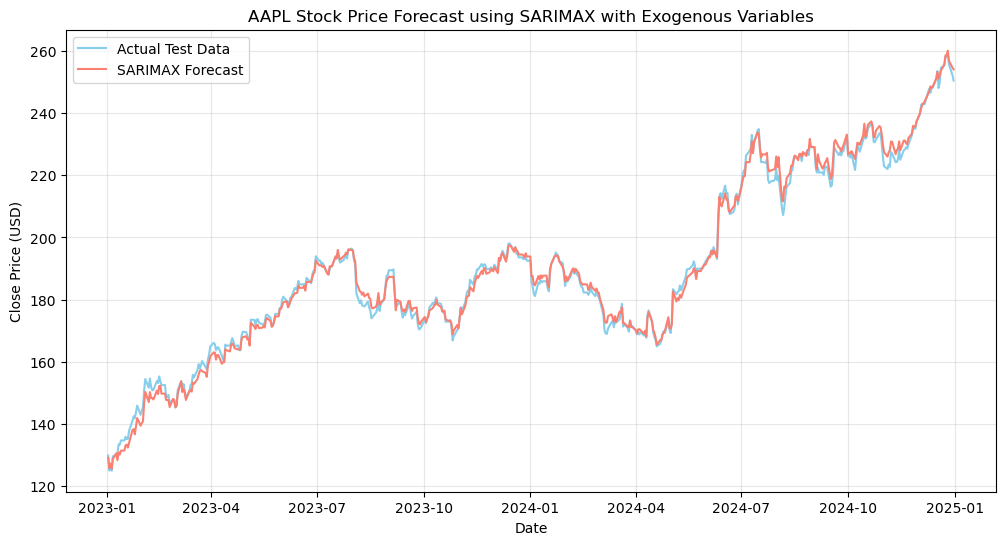

In [28]:
# Forecasting
forecast_result = final_fitted.get_forecast(steps=len(test_series), exog=exog_test)

# Extract the predicted mean (the central forecast)
forecast = forecast_result.predicted_mean
forecast.index = test_series.index # Assign the correct index to the forecast series

# Visualization
plt.figure(figsize=(12,6))
plt.plot(test_series.index, test_series.values, label="Actual Test Data", color='skyblue')
plt.plot(forecast.index, forecast.values, label=f"SARIMAX Forecast", color='salmon')
plt.title(f"AAPL Stock Price Forecast using SARIMAX with Exogenous Variables")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [29]:
# Evaluation metrics
test_data_aligned = test_series.dropna()
forecast_aligned = forecast.reindex(test_data_aligned.index).dropna()

mse = mean_squared_error(test_data_aligned, forecast_aligned)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data_aligned, forecast_aligned)
mape = mean_absolute_percentage_error(test_data_aligned, forecast_aligned) * 100

print(f"\nModel Performance:")
print(f"Test MSE: {mse:.4f} USD")
print(f"Test RMSE: {rmse:.4f} USD")
print(f"Test MAE: {mae:.4f} USD")
print(f"Test MAPE: {mape:.2f}%")


Model Performance:
Test MSE: 3.7831 USD
Test RMSE: 1.9450 USD
Test MAE: 1.5519 USD
Test MAPE: 0.84%


# Model-2 LSTM (Long Short-Term Memory)

In [32]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and Clean Data
df = pd.read_csv("AAPL_stock_data.csv")
df = df[['Close']]
df = df[pd.to_numeric(df['Close'], errors='coerce').notnull()]
df['Close'] = pd.to_numeric(df['Close'])

# Normalize Data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create Supervised Sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 60     
X, y = create_sequences(scaled_data, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train/Test Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build and Compile Model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)),  
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
print("Model compiled")

Model compiled


Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - loss: 0.0134 - val_loss: 9.5803e-04
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 5.4507e-04 - val_loss: 0.0018
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 4.6956e-04 - val_loss: 0.0014
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 4.5562e-04 - val_loss: 9.3995e-04
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 4.4916e-04 - val_loss: 0.0012
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - loss: 4.3842e-04 - val_loss: 0.0010
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 4.2154e-04 - val_loss: 9.0854e-04
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - loss: 3.8461e-04 - val_loss: 7.9643e-04
Epoch 9/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 3.6942e-04 - val_loss: 6.9363e-04
Epoch 10/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 3.6940e-04 - val_loss: 9.5553e-04
Epoch 11/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 3.5625e-04 - val_

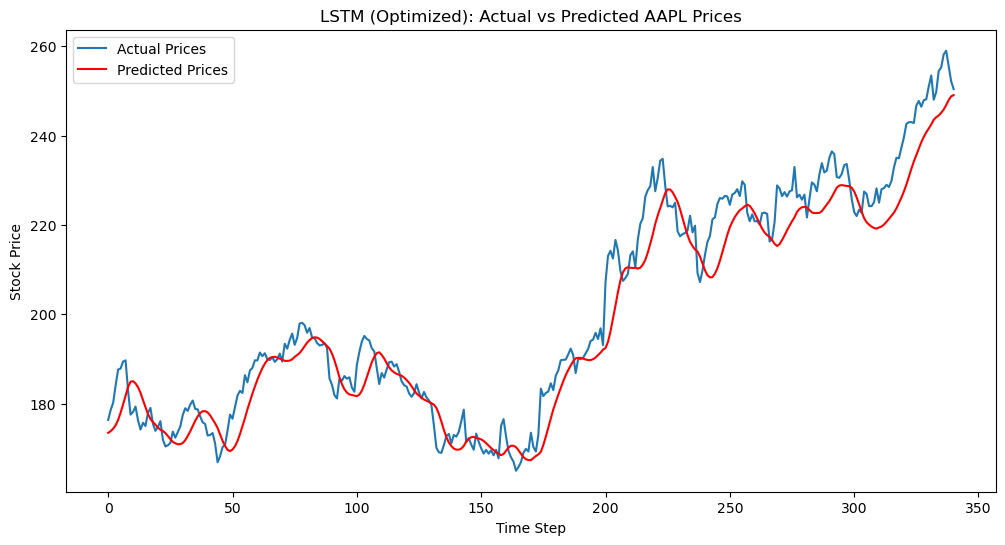

In [33]:
# Train the Model
history = model.fit(X_train, y_train, epochs=15, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)
print("Model trained")

# Make Predictions
y_pred = model.predict(X_test)

# Inverse Transform
y_test_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_prices = scaler.inverse_transform(y_pred)

# Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(y_test_prices, label="Actual Prices")
plt.plot(y_pred_prices, label="Predicted Prices", color='red')
plt.title("LSTM (Optimized): Actual vs Predicted AAPL Prices")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [34]:
# Evaluate Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual = y_test_prices.reshape(-1)
preds  = y_pred_prices.reshape(-1)

mse = mean_squared_error(actual, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, preds)
mape = np.mean(np.abs((actual - preds) / (actual + 1e-8))) * 100

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test MAPE: {mape:.2f}%")

Test MSE: 40.5420
Test RMSE: 6.3673
Test MAE: 5.0678
Test MAPE: 2.46%


In [36]:
# Generate 30-day future forecast using your trained LSTM model
future_predictions = []

last_sequence = X_test[-1] 
current_seq = last_sequence.copy()

for _ in range(30):  
    next_pred = model.predict(current_seq.reshape(1, current_seq.shape[0], 1), verbose=0)
    future_predictions.append(next_pred[0, 0])
    
    # Slide window forward
    current_seq = np.append(current_seq[1:], next_pred)
    
# Inverse transform to get actual scale (USD)
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

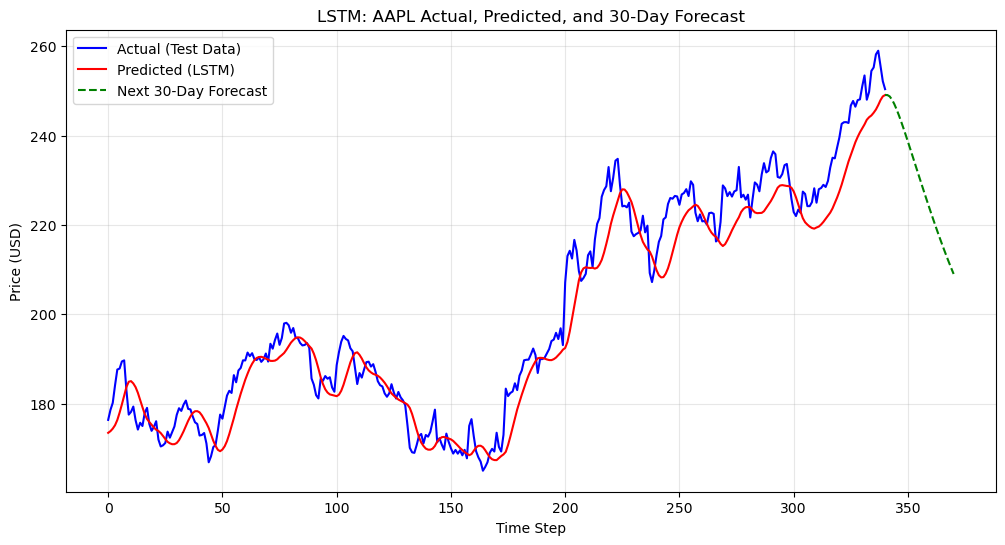

In [37]:
plt.figure(figsize=(12,6))

# Plot actual test data (blue)
plt.plot(y_test_prices, label="Actual (Test Data)", color='blue')

# Plot model predictions (red)
plt.plot(y_pred_prices, label="Predicted (LSTM)", color='red')

# Fix lengths: forecast_x should have 31 points (1 for last_point + 30 forecasted days)
last_point = y_pred_prices[-1].flatten()[0]   # make scalar
forecast_x = np.arange(len(y_test_prices) - 1, len(y_test_prices) + len(future_predictions))

# Plot future forecast (green)
plt.plot(
    forecast_x,
    np.concatenate(([last_point], future_predictions.flatten())),
    label="Next 30-Day Forecast",
    color='green',
    linestyle='--'
)

plt.title("LSTM: AAPL Actual, Predicted, and 30-Day Forecast")
plt.xlabel("Time Step")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

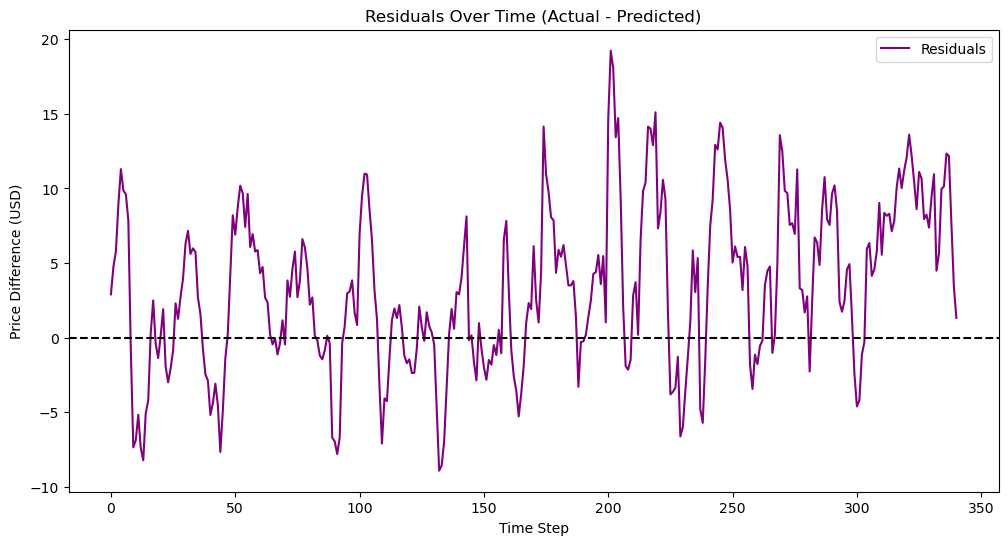

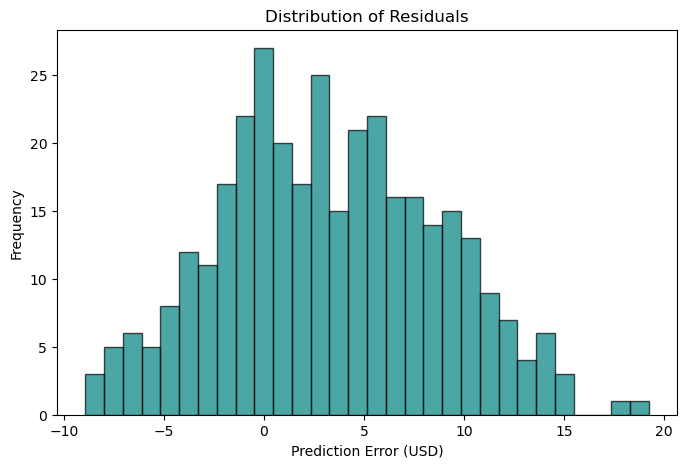

Mean Residual: 3.3031
Residual Std Dev: 5.4435


In [38]:
# Residual Analysis
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals (difference between actual and predicted)
residuals = y_test_prices.flatten() - y_pred_prices.flatten()

# Plot residuals over time
plt.figure(figsize=(12,6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals Over Time (Actual - Predicted)")
plt.xlabel("Time Step")
plt.ylabel("Price Difference (USD)")
plt.legend()
plt.show()

# Histogram of residuals to check distribution
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error (USD)")
plt.ylabel("Frequency")
plt.show()

# Print mean and standard deviation of residuals
print(f"Mean Residual: {np.mean(residuals):.4f}")
print(f"Residual Std Dev: {np.std(residuals):.4f}")

# Comparison of Models

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

y_test_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_prices = scaler.inverse_transform(model.predict(X_test))

actual_lstm = y_test_prices.flatten()
pred_lstm = y_pred_prices.flatten()

actual_sarimax = test_series.values
pred_sarimax = forecast.values

min_len = min(len(actual_lstm), len(actual_sarimax))
actual_lstm, pred_lstm = actual_lstm[:min_len], pred_lstm[:min_len]
actual_sarimax, pred_sarimax = actual_sarimax[:min_len], pred_sarimax[:min_len]

def evaluate_model(name, actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted) * 100
    return {"Model": name, "MSE": mse, "RMSE": rmse, "MAE": mae, "MAPE": mape}

results = []
results.append(evaluate_model("SARIMAX", actual_sarimax, pred_sarimax))
results.append(evaluate_model("LSTM", actual_lstm, pred_lstm))

comparison_df = pd.DataFrame(results).set_index("Model").round(4)
print("\nModel Performance Comparison:")
print(comparison_df)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step

Model Performance Comparison:
            MSE    RMSE     MAE    MAPE
Model                                  
SARIMAX   3.221  1.7947  1.4378  0.8562
LSTM     40.542  6.3673  5.0678  2.4621


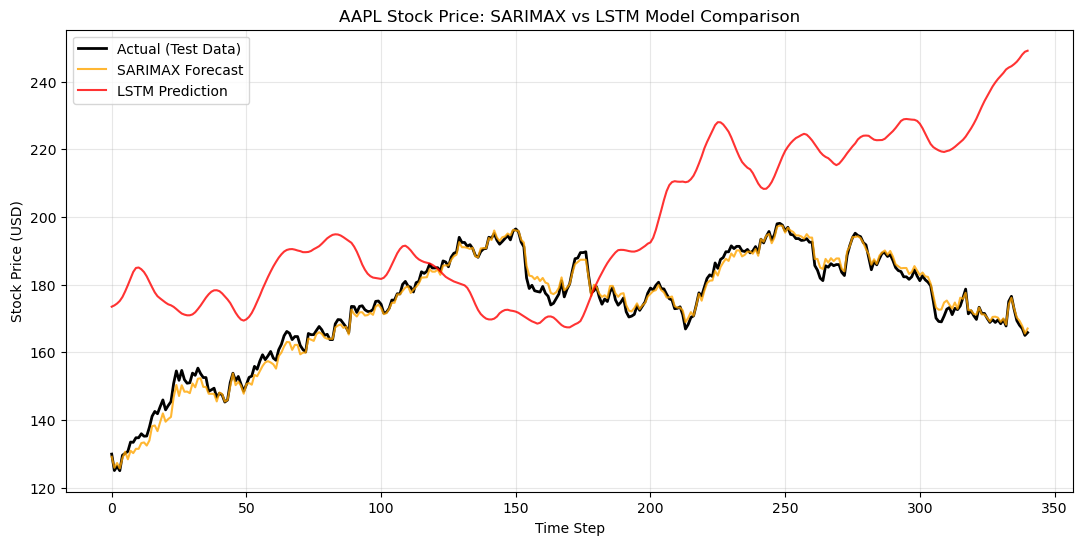

In [40]:
plt.figure(figsize=(13,6))
plt.plot(actual_sarimax, label="Actual (Test Data)", color='black', linewidth=2)
plt.plot(pred_sarimax, label="SARIMAX Forecast", color='orange', alpha=0.8)
plt.plot(pred_lstm, label="LSTM Prediction", color='red', alpha=0.8)
plt.title("AAPL Stock Price: SARIMAX vs LSTM Model Comparison")
plt.xlabel("Time Step")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

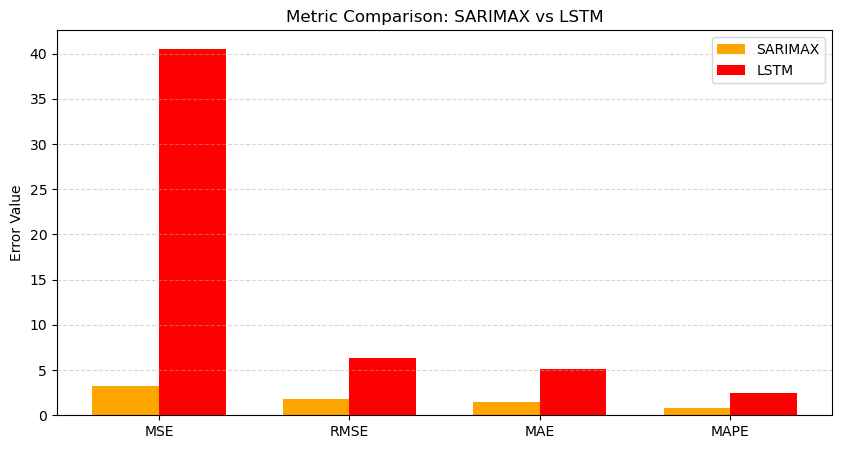

In [41]:
plt.figure(figsize=(10,5))
x = np.arange(len(comparison_df.columns))
bar_width = 0.35

plt.bar(x - bar_width/2, comparison_df.loc["SARIMAX"], bar_width, label='SARIMAX', color='orange')
plt.bar(x + bar_width/2, comparison_df.loc["LSTM"], bar_width, label='LSTM', color='red')

plt.xticks(x, comparison_df.columns)
plt.ylabel("Error Value")
plt.title("Metric Comparison: SARIMAX vs LSTM")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()